# 와인 데이터 회귀

## 문제 정의 및 학습 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['label'] = wine.target

y = wine_df['label']
x = wine_df.drop(['label'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [2]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## 선형회귀 모델

In [5]:
from sklearn.linear_model import LinearRegression

wine_model = LinearRegression()

wine_model.fit(x_train, y_train)
print('weight:', wine_model.coef_)
print('bias:', wine_model.intercept_)

weight: [-1.11728579e-01  3.37653113e-02 -1.87904561e-01  4.45604189e-02
 -7.41618762e-05  1.38481468e-01 -3.67642225e-01 -2.95477525e-01
  4.09511113e-02  8.21216726e-02 -1.08885151e-01 -2.64095780e-01
 -6.83599477e-04]
bias: 3.252956550555112


In [6]:
coef = pd.Series(data=np.round(wine_model.coef_, 1), index=x.columns)
coef

alcohol                        -0.1
malic_acid                      0.0
ash                            -0.2
alcalinity_of_ash               0.0
magnesium                      -0.0
total_phenols                   0.1
flavanoids                     -0.4
nonflavanoid_phenols           -0.3
proanthocyanins                 0.0
color_intensity                 0.1
hue                            -0.1
od280/od315_of_diluted_wines   -0.3
proline                        -0.0
dtype: float64

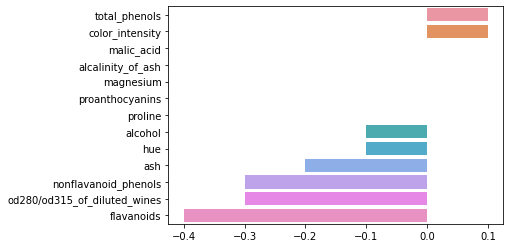

In [7]:
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

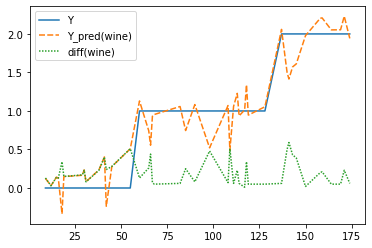

In [8]:
y_pred = wine_model.predict(x_test)
wine_df=pd.DataFrame(data={'Y':y_test, 'Y_pred(wine)':y_pred, 'diff(wine)':np.round(np.abs(y_test-y_pred),2)})
sns.lineplot(data=wine_df)

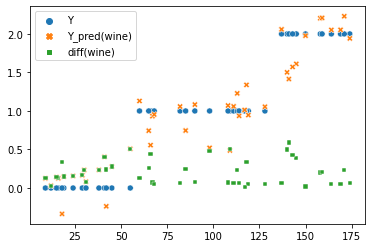

In [9]:
sns.scatterplot(data=wine_df)

In [10]:
score = wine_model.score(x_test, y_test)
print('선형회귀 모델 R2: {0:.2f}'.format(score))

선형회귀 모델 R2: 0.89


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))


y_pred = wine_model.predict(x_test)
printRegressorResult(y_test, y_pred)

MSE : 0.067 , RMSE : 0.259, r2 : 0.887


In [12]:
result = pd.DataFrame({'y': y_test.values, 'y_pred': y_pred, 'diff': np.abs(y_test.values - y_pred)})
result.sort_values(by=['diff'], ascending=False).head()

,y,y_pred,diff
9,2,1.414807,0.585193
8,1,0.487762,0.512238
29,0,0.508777,0.508777
2,2,1.501741,0.498259
38,1,0.521567,0.478433


## 선형회귀모델 응용

### ①독립변수 선택

In [13]:
from sklearn.feature_selection import SelectKBest, f_regression

# k = 3
# 사이킷런 제공 SelectKBest 클래스 : 상관관계가 높은 변수 k개 추출해줌
# f_regression : 사이킷런 제공 함수, 회귀모델에서 독립변수와 종속변수간 평가결과(F-value)를 반환
# 전진선택법 : k 값을 늘려가면서 최적의 모델을 찾는 방법
# 후진제거법 : k 값을 줄여가면서 최적의 모델을 찾는 방법
X_selected = SelectKBest(score_func = f_regression, k = 3)
X_selected.fit_transform(x, y)
# X_selected.get_support() : 선택된 특성 인덱스(Boolean)
features = x.columns[X_selected.get_support()]    
print('features = {}'.format(features))

features = Index(['total_phenols', 'flavanoids', 'od280/od315_of_diluted_wines'], dtype='object')


In [14]:
wine_df.head()

,Y,Y_pred(wine),diff(wine)
19,0,0.148310,0.15
45,0,0.278005,0.28
140,2,1.501741,0.50
30,0,0.234126,0.23
67,1,0.931613,0.07


In [15]:
# 위에서 만든 상관관계가 높은 변수만 독립변수로 해서 회귀모델 객체 재생성 및 데이터 분할, 학습, 예측
X_selected = wine_df[features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

wine_model2 = LinearRegression()
wine_model2.fit(X_train, y_train)

# print('weight:', lr_model2.coef_)
# print('bias:',lr_model2.intercept_)

y_pred = wine_model2.predict(X_test)
printRegressorResult(y_test, y_pred)

KeyError: ignored

### ②다항회귀 모델

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x_selected)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3, random_state=42)

poly_model = LinearRegression()
poly_model.fit(x_train, y_train)

y_pred = poly_model.predict(x_test)
printRegressorResult(y_test, y_pred)

### ③데이터 전처리

In [ ]:
from sklearn.preprocessing import StandardScaler
X_selected_scaled = StandardScaler().fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model3 = LinearRegression()
lr_model3.fit(X_train, y_train)

y_pred = lr_model3.predict(X_test)
printRegressorResult(y_test, y_pred)

## 의사결정나무 기반의 회귀 알고리즘

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)

score = tree_model.score(x_test, y_test)
print('의사결정나무 R2: {0:.2f}'.format(score))

In [ ]:
y_pred = tree_model.predict(x_test)

tree_df = pd.DataFrame(data={'Y':y_test, 'Y_pred(tree)':y_pred, 'diff(tree)':np.round(np.abs(y_test-y_pred),2)})
tree_df.sort_values(by=['diff(tree)'], ascending=False).head(10)

In [ ]:
y_pred = wine_model.predict(x_test)
wine_df=pd.DataFrame(data={'Y':y_test, 'Y_pred(tree)':y_pred, 'diff(tree)':np.round(np.abs(y_test-y_pred),2)})
sns.lineplot(data=wine_df)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

model_list = [forest_model, lgb_model, xgb_model]

for model in model_list:
    model.fit(x_train , y_train)
    score = model.score(x_test, y_test)
    model_name = model.__class__.__name__
    print('{0} 모델 R2: {1:.2f}'.format(model_name, score))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

model_list = [wine_model, tree_model, forest_model, lgb_model, xgb_model]

for model in model_list:
    y_preds = model.predict(x_test)    
    print('{0} 모델'.format(model.__class__.__name__)) 
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_preds)
    print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))